<a href="https://colab.research.google.com/github/aakashkumarme/MLAlgo/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

16.Logistic Regression is actually a widely used supervised
classification technique.

Problem
You need to train a simple classifier model

In [1]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)
# Train model
model = logistic_regression.fit(features_standardized, target)


In a logistic regression,
a linear model (e.g., β0 + β1x) is included in a logistic (also called sigmoid) function:

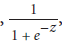
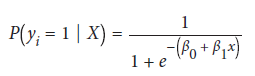

where P(yi = 1 | X) is the probability of the ith observation’s target value, yi, being class
1, X is the training data, β0 and β1 are the parameters to be learned, and e is Euler’s
number.The effect of the logistic function is to constrain the value of the function’s
output to between 0 and 1.

Problem
Given more than two classes, you need to train a classifier model.

In [2]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
# Train model
model = logistic_regression.fit(features_standardized, target)

Logistic regressions are only binary classifiers, meaning they cannot
handle target vectors with more than two classes.

Alternatively, in multinomial logistic regression (MLR) the logistic function we saw is replaced with a softmax function:

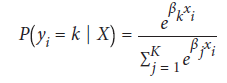

where P(yi = k | X) is the probability of the ith observation’s target value, yi, is class k,
and K is the total number of classes. One practical advantage of the MLR is that its
predicted probabilities using the predict_proba method are more reliable (i.e., better
calibrated).


Problem
You need to reduce the variance of your logistic regression model.

In [4]:
# Load libraries
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create decision tree classifier object
logistic_regression = LogisticRegressionCV(
penalty='l2', Cs=10, random_state=0, n_jobs=-1)
# Train model
model = logistic_regression.fit(features_standardized, target)

Regularization is a method of penalizing complex models to reduce their variance.
Specifically, a penalty term is added to the loss function we are trying to minimize,
typically the L1 and L2 penalties.

L1 penalty:
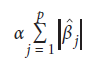

where βj is the parameters of the jth of p features being learned and α is a hyperparameter
denoting the regularization strength.

L2 penalty:

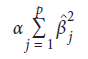

Higher values of α increase the penalty for larger parameter values (i.e., more complex
models). scikit-learn follows the common method of using C instead of α where
C is the inverse of the regularization strength: C = 1α
. To reduce variance while using
logistic regression, we can treat C as a hyperparameter to be tuned to find the value of
C that creates the best model.

In scikit-learn we can use the LogisticRegressionCV
class to efficiently tune C. LogisticRegressionCV’s parameter, Cs, can either accept a
range of values for C to search over (if a list of floats is supplied as an argument) or if
supplied an integer, will generate a list of that many candidate values drawn from a
logarithmic scale between –10,000 and 10,000.


Problem
You need to train a simple classifier model on a very large set of data.

In [5]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0, solver="sag")
# Train model
model = logistic_regression.fit(features_standardized, target)

scikit-learn’s LogisticRegression offers a number of techniques for training a logistic
regression, called solvers. Most of the time scikit-learn will select the best solver
automatically for us

Handling Imbalanced Classes 
Problem :
You need to train a simple classifier model.

In [7]:
# Load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create decision tree classifier object
logistic_regression = LogisticRegression(random_state=0, class_weight="balanced")
# Train model
model = logistic_regression.fit(features_standardized, target)

If we have highly imbalanced
classes and have not addressed it during preprocessing, we have the option of using
the class_weight parameter to weight the classes to make certain we have a balanced
mix of each class. Specifically, the balanced argument will automatically weigh classes
inversely proportional to their frequency:

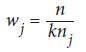

where wj is the weight to class j, n is the number of observations, nj is the number of
observations in class j, and k is the total number of classes.